In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten, Dropout, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU

def test_model():
    model = Sequential()
    model.add(Dense(10, input_dim=5))
    model.add(LeakyReLU(alpha=0.2))
    return model

model = test_model()
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 10)                0         
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
# Charger le dataset MNIST
(x_train, _), (_, _) = mnist.load_data()
x_train = (x_train - 127.5) / 127.5  # Normaliser les images entre -1 et 1
x_train = np.expand_dims(x_train, axis=-1)  # Ajouter une dimension pour le canal


In [37]:
from tensorflow.keras.models import Sequential
def build_generator(noise_vector):
    model= Sequential()
    model.add(Dense(256,input_dim=noise_vector))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(28 * 28 * 1, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model


In [ ]:
noise_vector= 100
generator =  build_generator(100)

In [42]:
def build_discriminator():
    model =Sequential()
    model.add(Flatten(input_shape=(28,28,1)))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [43]:
# Dimensions du bruit
noise_dim = 100

# Création du générateur et du discriminateur
generator = build_generator(noise_dim)
discriminator = build_discriminator()

discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Création du GAN en combinant les deux modèles
discriminator.trainable = False

gan_input = tf.keras.Input(shape=(noise_dim,))
generated_image = generator(gan_input)

gan_output = discriminator(generated_image)

gan = tf.keras.Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')


In [45]:
def train_gan(epochs, batch_size, sample_interval):
    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # Entraînement du discriminateur
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_imgs = x_train[idx]

        noise = np.random.normal(0, 1, (batch_size, noise_dim))
        generated_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_imgs, real)
        d_loss_fake = discriminator.train_on_batch(generated_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Entraînement du générateur
        noise = np.random.normal(0, 1, (batch_size, noise_dim))
        g_loss = gan.train_on_batch(noise, real)

        # Affichage de l'avancement avec informations détaillées
        if epoch % sample_interval == 0:
            print(f"Époque: {epoch}/{epochs}")
            print(f"  Discriminateur - loss real: {d_loss_real[0]:.4f}, loss fake: {d_loss_fake[0]:.4f}, loss totale: {d_loss[0]:.4f}, Exactitude: {100 * d_loss[1]:.2f}%")
            print(f"  Générateur  - loss: {g_loss}")
            sample_images(epoch)

In [46]:
def sample_images(epoch, grid_size=5):
    noise = np.random.normal(0, 1, (grid_size * grid_size, noise_dim))
    gen_imgs = generator.predict(noise)

    # Mise à l'échelle des images générées de [-1, 1] à [0, 1]
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(5, 5), sharex=True, sharey=True)
    count = 0
    for i in range(grid_size):
        for j in range(grid_size):
            axs[i, j].imshow(gen_imgs[count, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            count += 1
    plt.show()

2/2 [==============================] - 0s 4ms/step
Époque: 0/1000
  Discriminateur - loss real: 0.7188, loss fake: 0.7537, loss totale: 0.7363, Exactitude: 33.59%
  Générateur  - loss: 0.8251653909683228
1/1 [==============================] - 0s 48ms/step


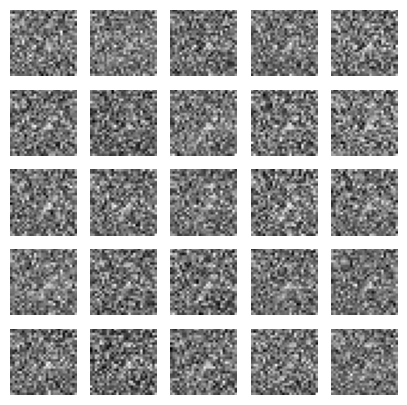

2/2 [==============================] - 0s 3ms/step
Époque: 100/1000
  Discriminateur - loss real: 0.0001, loss fake: 0.0001, loss totale: 0.0001, Exactitude: 100.00%
  Générateur  - loss: 9.587571144104004
1/1 [==============================] - 0s 14ms/step


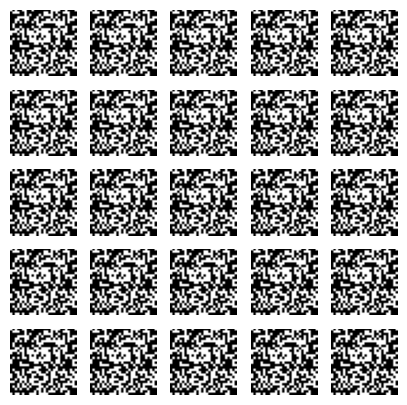

2/2 [==============================] - 0s 3ms/step
Époque: 200/1000
  Discriminateur - loss real: 0.0018, loss fake: 0.0001, loss totale: 0.0010, Exactitude: 100.00%
  Générateur  - loss: 9.870996475219727
1/1 [==============================] - 0s 17ms/step


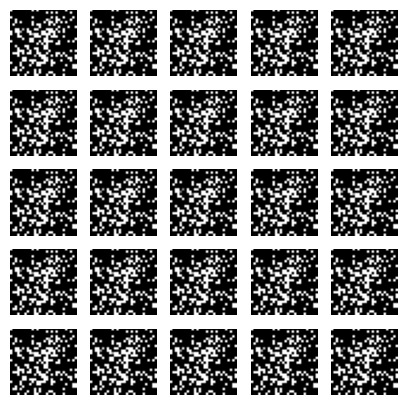

2/2 [==============================] - 0s 4ms/step
Époque: 300/1000
  Discriminateur - loss real: 0.0001, loss fake: 0.0001, loss totale: 0.0001, Exactitude: 100.00%
  Générateur  - loss: 9.84481143951416
1/1 [==============================] - 0s 14ms/step


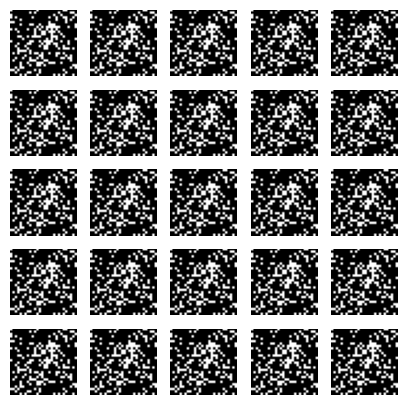

2/2 [==============================] - 0s 4ms/step
Époque: 400/1000
  Discriminateur - loss real: 0.0000, loss fake: 0.0000, loss totale: 0.0000, Exactitude: 100.00%
  Générateur  - loss: 10.652273178100586
1/1 [==============================] - 0s 15ms/step


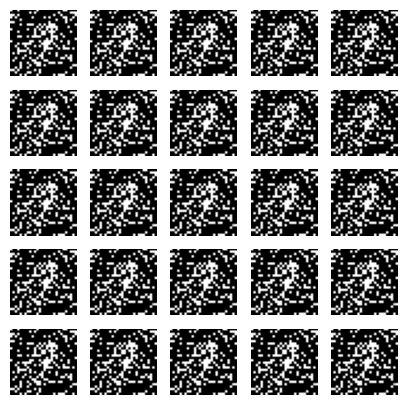

2/2 [==============================] - 0s 4ms/step
Époque: 500/1000
  Discriminateur - loss real: 0.0000, loss fake: 0.0000, loss totale: 0.0000, Exactitude: 100.00%
  Générateur  - loss: 11.711660385131836
1/1 [==============================] - 0s 14ms/step


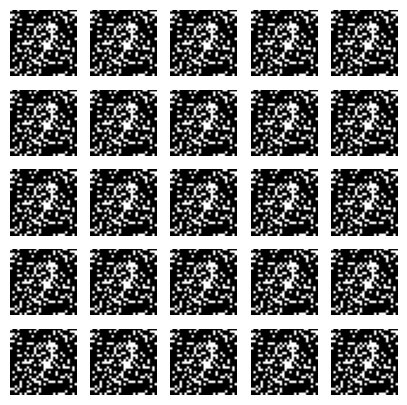

2/2 [==============================] - 0s 4ms/step
Époque: 600/1000
  Discriminateur - loss real: 0.0000, loss fake: 0.0000, loss totale: 0.0000, Exactitude: 100.00%
  Générateur  - loss: 11.626943588256836
1/1 [==============================] - 0s 14ms/step


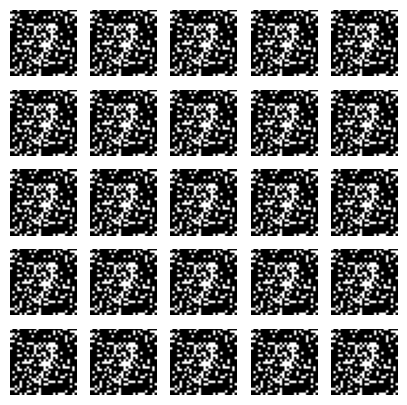

2/2 [==============================] - 0s 3ms/step
Époque: 700/1000
  Discriminateur - loss real: 0.0000, loss fake: 0.0000, loss totale: 0.0000, Exactitude: 100.00%
  Générateur  - loss: 12.335548400878906
1/1 [==============================] - 0s 13ms/step


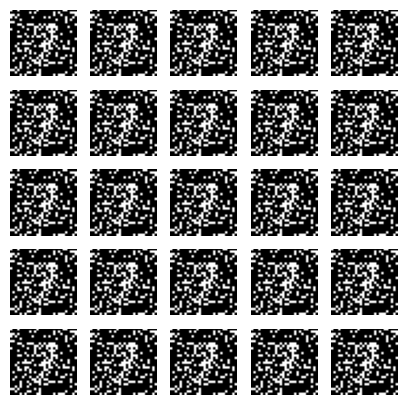

2/2 [==============================] - 0s 4ms/step
Époque: 800/1000
  Discriminateur - loss real: 0.0001, loss fake: 0.0002, loss totale: 0.0002, Exactitude: 100.00%
  Générateur  - loss: 8.983908653259277
1/1 [==============================] - 0s 14ms/step


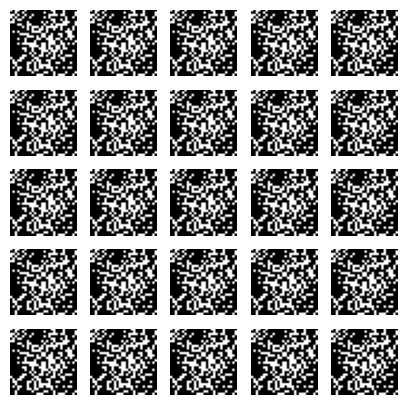

2/2 [==============================] - 0s 4ms/step
Époque: 900/1000
  Discriminateur - loss real: 0.0000, loss fake: 0.0000, loss totale: 0.0000, Exactitude: 100.00%
  Générateur  - loss: 12.171537399291992
1/1 [==============================] - 0s 15ms/step


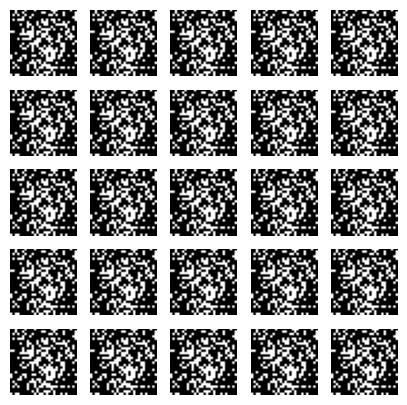

2/2 [==============================] - 0s 5ms/step


In [47]:
train_gan(epochs=1000, batch_size=64, sample_interval=100)